## Imports

In [2]:
import numpy as np
from numpy.polynomial.hermite import hermval
from scipy import special
from scipy.special import factorial as fac
from random import randint
import matplotlib.pyplot as plt
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.palettes import Category10
from bokeh.io import output_notebook
from bokeh.models import HoverTool, ColumnDataSource
from sympy import symbols, diff, lambdify, exp, factorial, summation
from numba import cuda
import numba

## Hermite Lambda Function

In [3]:
hermite_recursion_base = lambda x, n :  1.0 if(n==0) else 2*x
hermite_y = lambda x, n: hermite_recursion_base(x,n) if(n==0 or n==1) else 2*x*hermite_y(x,n-1) - 2*(n-1)*hermite_y(x,n-2)

## Hermite Polynomial n

In [4]:
def hermyte_polynomial_n(n):
  x = symbols('x')
  return  lambdify(x,((-1)**n)*exp(x**2)*diff( exp(-x**2), x, n))

## Hermite Polynomial n : Explicit Expression

In [5]:
def hermyte_polynomial_n_ex(n):
  x = symbols('x')
  l = symbols('l')
  return  lambdify(x,factorial(n)*summation(((((-1.0)**((n/2.0)-l))*(2.0*x)**(2.0*l))/(factorial(2.0*l)*factorial((n/2.0)-l))), \
         (l, 0, int(n/2)))) if(n%2.0 == 0) else lambdify(x,factorial(n)*summation(((((-1.0)**(((n-1)/2.0)-l))* \
         (2.0*x)**(2.0*l + 1.0))/(factorial(2.0*l + 1.0)*factorial(((n-1.0)/2.0)-l))), (l, 0, int((n-1)/2))))

## Hermite Polynomial n: Explicit Expression 2

In [6]:
def hermyte_polynomial_n_ex_2(n,x):

  h_n_x = 0.0

  if(n%2.0 == 0):
    for l in range(int(n/2)+1):
      h_n_x += fac(n) * ( ( (-1.0)**((n/2.0)-l)) * ((2.0*x)**(2.0*l))) / ( fac(2.0*l) * fac((n/2.0)-l))

  else:
    for l in range(int((n-1)/2)+1):
      h_n_x += fac(n) * ( ( (-1.0)**(((n-1)/2.0)-l)) * (2.0*x)**(2.0*l + 1.0)) / (fac(2.0*l + 1.0) * fac(((n-1.0)/2.0)-l))

  return h_n_x

## Plot Hermite Polynomial

In [14]:
def HER_plot_1(n,y_limite):

  x_vals = np.linspace(-np.pi,np.pi,1000)

  for i in range(n):
    y_vals = []
    for x in x_vals:
      y_vals.append(hermite_y(x,i))
    plt.plot(x_vals,y_vals,label='n = '+str(i))
  plt.legend()
  plt.grid(True)
  plt.ylim([-y_limite,y_limite])
  plt.show()

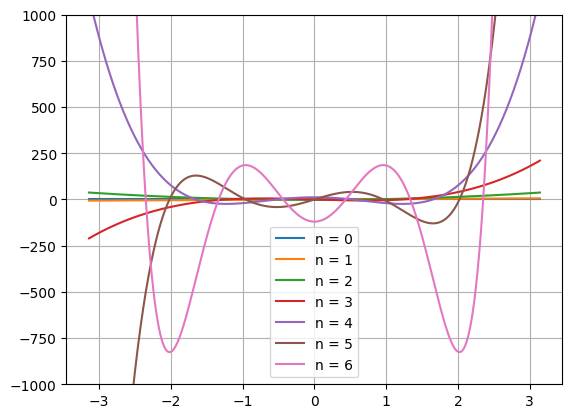

In [15]:
HER_plot_1(7,1000)

In [16]:
def HER_plot_2(n,y_limite):

  x_vals = np.linspace(-np.pi,np.pi,1000)
  p = figure(title='', x_axis_label='', y_axis_label='')

  for i in range(n):
    y_vals = []
    for x in x_vals:
      y_vals.append(hermite_y(x,i))
    p.line(x_vals,y_vals, legend_label='n = '+str(i), line_width=2,color=Category10[10][i])
  output_notebook()
  show(p)


In [17]:
HER_plot_2(7,1000)

Loading BokehJS ...

In [18]:
def HER_plot_3(n,y_limite):

  x_vals = np.linspace(-np.pi,np.pi,1000)

  for i in range(n):
    y_vals = []
    hpn = hermyte_polynomial_n(i)
    for x in x_vals:
      y_vals.append(float(hpn(x)))
    plt.plot(x_vals,y_vals,label='n = '+str(i))
  plt.legend()
  plt.grid(True)
  plt.ylim([-y_limite,y_limite])
  plt.show()

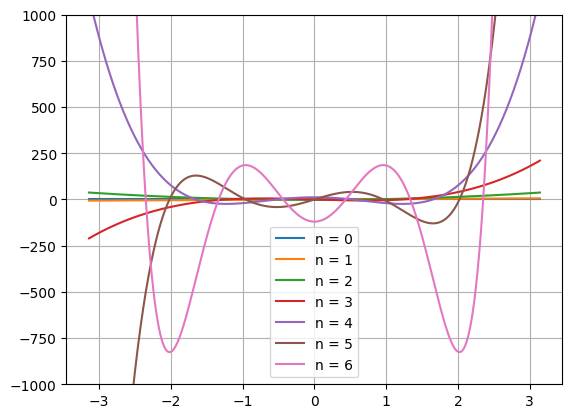

In [19]:
HER_plot_3(7,1000)

In [20]:
def HER_plot_4(n,y_limite):

  x_vals = np.linspace(-np.pi,np.pi,1000)
  p = figure(title='', x_axis_label='', y_axis_label='')

  for i in range(n):
    y_vals = []
    hpn = hermyte_polynomial_n_ex(i)
    for x in x_vals:
      y_vals.append(float(hpn(x)))
    p.line(x_vals,y_vals, legend_label='n = '+str(i), line_width=2,color=Category10[10][i])
  output_notebook()
  show(p)


In [21]:
HER_plot_4(7,1000)

Loading BokehJS ...

In [22]:
def HER_plot_5(n,y_limite):

  x_vals = np.linspace(-np.pi,np.pi,1000)

  for i in range(n):
    y_vals = []
    hpn = hermyte_polynomial_n_ex(i)
    for x in x_vals:
      y_vals.append(float(hpn(x)))
    plt.plot(x_vals,y_vals,label='n = '+str(i))
  plt.legend()
  plt.grid(True)
  plt.ylim([-y_limite,y_limite])
  plt.show()

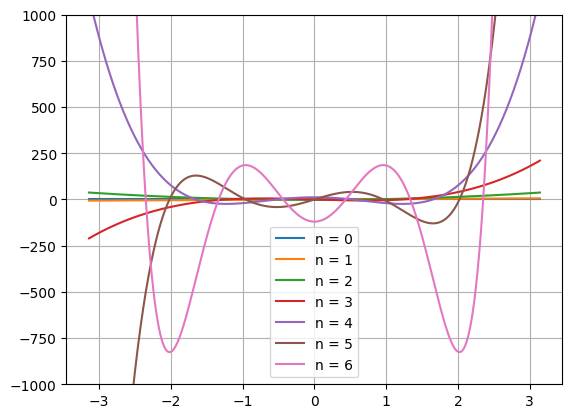

In [23]:
HER_plot_5(7,1000)

In [24]:
def HER_plot_6(n,y_limite):

  x_vals = np.linspace(-np.pi,np.pi,1000)
  p = figure(title='', x_axis_label='', y_axis_label='')

  for i in range(n):
    y_vals = []
    for x in x_vals:
      y_vals.append(float(hermyte_polynomial_n_ex_2(i,x)))
    p.line(x_vals,y_vals, legend_label='n = '+str(i), line_width=2,color=Category10[10][i])
  output_notebook()
  show(p)

In [25]:
HER_plot_6(7,1000)

Loading BokehJS ...

In [26]:
def HER_plot_7(n,y_limite):

  x_vals = np.linspace(-np.pi,np.pi,1000)

  for i in range(n):
    y_vals = []
    for x in x_vals:
      y_vals.append(float(hermyte_polynomial_n_ex_2(i,x)))
    plt.plot(x_vals,y_vals,label='n = '+str(i))
  plt.legend()
  plt.grid(True)
  plt.ylim([-y_limite,y_limite])
  plt.show()

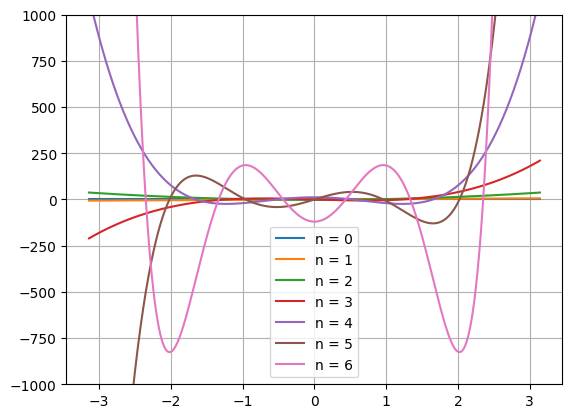

In [27]:
HER_plot_7(7,1000)

## Speed Tests

### Using hermyte_polynomial_n_ex function

In [20]:
#def test_1(n_fock, n_pol, n_vec, Random_Range1,Random_Range2):

#  return {"|"+str(i)+">": [hermyte_polynomial_n_ex(n_pol)(randint(Random_Range1,Random_Range2)) for _ in range(n_vec)]  for i in range(n_fock)}


In [ ]:
#test_1(100,19,100,1000,2000)

### Using hermyte_polynomial_n_ex_2 function

In [28]:
def test_2(n_fock, n_pol, n_vec, Random_Range1,Random_Range2):

  return {"|"+str(i)+">": [hermyte_polynomial_n_ex_2(n_pol,randint(Random_Range1,Random_Range2)) for _ in range(n_vec)]  for i in range(n_fock)}

In [29]:
test_2(100,19,100,1000,2000)

{'|0>': [2.108487354272124e+63,
  4.619645243591608e+66,
  6.18529429992198e+67,
  9.288951857593711e+67,
  6.827393720237648e+62,
  7.517926505506514e+65,
  5.717274955697624e+63,
  1.4425652509277568e+65,
  3.4446017020271545e+65,
  2.671430248612078e+68,
  4.1023248305572336e+65,
  2.1050470324442303e+65,
  5.1361462728344883e+67,
  7.780784669898559e+62,
  2.389660657835715e+66,
  5.640645170706655e+65,
  7.496242944084901e+62,
  2.9725079005364534e+66,
  9.810208408396646e+64,
  8.835415632402505e+66,
  1.0795222842271017e+68,
  7.138442441426423e+67,
  1.846067963440225e+67,
  1.265561312481239e+68,
  4.213508609888973e+65,
  2.359674899026992e+68,
  7.902729249645271e+67,
  6.775563277026877e+65,
  4.957307713473609e+66,
  1.4425652509277568e+65,
  1.5259433600359732e+68,
  4.203211088126007e+66,
  7.972786145870805e+66,
  9.087801870688702e+63,
  5.256851180901618e+63,
  2.6775802200025206e+64,
  4.00858168053841e+66,
  6.112856826889682e+63,
  2.0626172558473162e+68,
  4.50409

### Using a CUDA implementation

In [8]:
# CUDA kernel function to compute the factorial of a given number 'n'
@cuda.jit(device=True)
def factorial(n):
    result = 1
    # Multiply 'result' by each integer from 1 to 'n'
    for i in range(1, n + 1):
        result *= i
    return result

# CUDA kernel function to compute a Hermite polynomial of even degree 'n' at position 'x'
@cuda.jit
def hermyte_polynomial_n_cuda_l_even(n, x, result):
    # Get the unique indices for each thread within the grid
    idx, idy = cuda.grid(2)
    # Compute the numerator part of the polynomial's term
    numerator = factorial(n) * ((-1.0) ** ((n / 2.0) - idx)) * ((2.0 * x[idy]) ** (2.0 * idx))
    # Compute the denominator part of the polynomial's term
    denominator = factorial(2.0 * idx) * factorial((n / 2.0) - idx)
    # Store the result of the division of numerator by denominator
    result[idx, idy] = numerator / denominator

# CUDA kernel function to compute a Hermite polynomial of odd degree 'n' at position 'x'
@cuda.jit
def hermyte_polynomial_n_cuda_l_odd(n, x, result):
    # Get the unique indices for each thread within the grid
    idx, idy = cuda.grid(2)
    # Compute the numerator part of the polynomial's term (notice the difference in the exponents compared to the even case)
    numerator = factorial(n) * ((-1.0) ** (((n - 1) / 2.0) - idx)) * ((2.0 * x[idy]) ** (2.0 * idx + 1.0))
    # Compute the denominator part of the polynomial's term
    denominator = factorial(2.0 * idx + 1.0) * factorial(((n - 1.0) / 2.0) - idx)
    # Store the result of the division of numerator by denominator
    result[idx, idy] = numerator / denominator


In [9]:
def hermyte_polynomial_n_cuda(n, n_vec, n_fock, x):
  # Initialize the number of threads per block
  if n % 2 == 0:
    threads_per_block = int(n / 2) + 1
  else:
    threads_per_block = int((n - 1) / 2) + 1

  # Number of blocks; n_vec is used to determine the number of blocks
  num_blocks = n_vec

  # Set the dimensions of the thread blocks and the grid
  threads_per_block_x = threads_per_block_y = threads_per_block_z = threads_per_block
  rows = threads_per_block_x
  cols = num_blocks
  n_matrix = n_fock
  blocks_per_grid_x = (rows + threads_per_block_x - 1) // threads_per_block_x
  blocks_per_grid_y = (cols + threads_per_block_y - 1) // threads_per_block_y
  blocks_per_grid_z = (n_matrix + threads_per_block_z - 1) // threads_per_block_z

  # Allocate memory on the GPU for the result
  result = cuda.device_array((rows, cols, n_matrix), dtype=np.float64)

  # Launch the appropriate CUDA kernel function depending on whether 'n' is even or odd
  if n % 2 == 0:
    hermyte_polynomial_n_cuda_l_even[(blocks_per_grid_x, blocks_per_grid_y, blocks_per_grid_z),(threads_per_block_x, threads_per_block_y,  threads_per_block_z)](n, x, result)
  else:
    hermyte_polynomial_n_cuda_l_odd[(blocks_per_grid_x, blocks_per_grid_y, blocks_per_grid_z),(threads_per_block_x, threads_per_block_y,  threads_per_block_z)](n, x, result)

  # Retrieve the result from the GPU
  result = result.copy_to_host()

  # Sum along the first axis to get the final result
  final_result = np.sum(result, axis=0)
  return final_result
  # Format the final result as a dictionary and return it
  #return {"|"+str(i)+">":  final_result[:,i:i+1].T[0] for i in range(n_fock)}


In [143]:
hermyte_polynomial_n_cuda(3,2,1,np.array([2.0]))[0][0]

40.0

### Numpy Hermite Polynomial

In [11]:
herm_numpy = lambda x,n: hermval(np.array([0.0 for _ in range(n)]+[x]),np.array([0.0 for _ in range(n)]+[1.0]))[-1]

### Scipy Hermite Polynomial

In [12]:
herm_scipy = lambda x,n: special.hermite(n)(x)

### Hermite Lambda Function vs Hermite Numpy 


In [22]:
N = 18
x_max = 10

hlf_vs_herm_numpy = [ np.mean(np.array([ (herm_numpy(x,n) - hermite_y(x,n))**2 for x in range(x_max+1)])) for n in range(N)]

In [14]:
def HER_vs_v1(N, y_vals, y_limite,title):
    # Cria uma nova figura
    p = figure(width=600, height=400)

    # Cria um DataSource contendo os dados que queremos plotar
    source = ColumnDataSource(data=dict(
        x=list(range(N)),
        y=y_vals,
    ))

    # Adiciona uma linha traçando y_vals contra a faixa de valores de 0 a N-1
    r = p.line('x', 'y', source=source, line_width=2, legend_label="MSE with x: [0-10] to each degree")
    
    # Adiciona círculos nos pontos para destacá-los
    p.circle('x', 'y', source=source, size=10, color="navy", alpha=0.5, legend_label="MSE with x: [0-10] to each degree")

    # Define os rótulos dos eixos x e y
    p.xaxis.axis_label = 'polynomial degree'
    p.yaxis.axis_label = 'Mean Square Error (MSE)'

    # Define o título do gráfico
    p.title.text = title

    # Define os limites para o eixo y
    p.y_range.start = 0
    p.y_range.end = y_limite
    
    # Configura um passo fixo no eixo x, certificando-se de que o passo não seja zero
    x_ticks = 10  # Defina o número desejado de ticks no eixo x
    p.xaxis.ticker = [i for i in range(0, N, max(1, N//x_ticks))]

    # Adiciona uma grade visível com linhas finas
    p.xgrid.grid_line_color = 'gray'
    p.ygrid.grid_line_color = 'gray'
    p.grid.grid_line_width = 0.5

    # Adiciona a funcionalidade de tooltip
    hover = HoverTool(
        tooltips=[
            ("index", "$index"),
            ("(x,y)", "($x, $y)"),
        ]
    )

    #p.add_tools(hover)

    # Mostra o gráfico (este irá renderizar no seu notebook Jupyter, se estiver usando um)
    output_notebook()
    show(p)


In [23]:
HER_vs_v1(18,hlf_vs_herm_numpy,10000000000.0,'Hermite Lambda Polynomial n vs Hermite Numpy')

Loading BokehJS ...

### Hermite Polynomial n vs Hermite Numpy 

In [115]:
N = 18
x_max = 10

hpn_vs_herm_numpy = [ np.mean(np.array([ (herm_numpy(x,n) - hermyte_polynomial_n(n)(x))**2 for x in range(x_max+1)])) for n in range(N)]

In [165]:
HER_vs_v1(18,hpn_vs_herm_numpy,1000000000000.0, "Hermite Polynomial n vs Hermite Numpy")

Loading BokehJS ...

### Hermite Polynomial n : Explicit Expression n vs Hermite Numpy 

In [114]:
N = 18
x_max = 10

hpn_ee_vs_herm_numpy = [ np.mean(np.array([ (herm_numpy(x,n) - hermyte_polynomial_n_ex(n)(x))**2 for x in range(x_max+1)])) for n in range(N)]

In [120]:
HER_vs_v1(18,hpn_ee_vs_herm_numpy,1000000000000.0,"Hermite Polynomial n : Explicit Expression n vs Hermite Numpy ")

Loading BokehJS ...

### Hermite Polynomial n : Explicit Expression n 2 vs Hermite Numpy 

In [140]:
N = 18
x_max = 10

hpn_ee_2_vs_herm_numpy = [ np.mean(np.array([ (herm_numpy(x,n) - hermyte_polynomial_n_ex_2(n,x))**2 for x in range(x_max+1)])) for n in range(N)]

In [141]:
HER_vs_v1(18,hpn_ee_vs_herm_numpy,1000000000000.0,"Hermite Polynomial n : Explicit Expression n 2 vs Hermite Numpy ")

Loading BokehJS ...

### Hermite Polynomial n : cuda vs Hermite Numpy 

In [147]:
N = 18
x_max = 10

hpn_ee_cuda_vs_herm_numpy = [ np.mean(np.array([ (herm_numpy(x,n) - hermyte_polynomial_n_cuda(n,2,1,np.array([x]))[0][0])**2 for x in range(x_max+1)])) for n in range(N)]

In [149]:
HER_vs_v1(18,hpn_ee_cuda_vs_herm_numpy,1000000000000.0,"Hermite Polynomial n : cuda vs Hermite Numpy ")

Loading BokehJS ...

In [148]:
hpn_ee_cuda_vs_herm_numpy

[0.0,
 0.0,
 0.0,
 0.0,
 5346576.0,
 4604288000.0,
 430675157328913.44,
 1.5141499131766198e+17,
 8.871543381367312e+18,
 7.242089689129733e+25,
 6.468590877340433e+23,
 2.3211380215045672e+27,
 8.121395150854127e+29,
 3.0425032286145923e+32,
 9.604777912173437e+34,
 3.2575887965216183e+37,
 1.3854490430905763e+230,
 3.551774649452204e+42]

### Hermite Lambda Function vs Scipy Hermite Polynomial

In [33]:
N = 17
x_max = 10

hlf_vs_herm_scipy = [ np.mean(np.array([ (herm_scipy(x,n) - hermite_y(x,n))**2 for x in range(x_max+1)])) for n in range(N)]

In [34]:
HER_vs_v1(18,hlf_vs_herm_scipy,10000000000.0,'Hermite Lambda Funtion n vs Hermite Scipy')

Loading BokehJS ...

### Hermite Polynomial n vs Scipy Hermite Polynomial

In [31]:
N = 18
x_max = 10

hpn_vs_herm_scipy = [ np.mean(np.array([ (herm_scipy(x,n) - hermyte_polynomial_n(n)(x))**2 for x in range(x_max+1)])) for n in range(N)]

In [32]:
HER_vs_v1(18,hpn_vs_herm_scipy,10000000000000.0,'Hermite Polynomial n vs Scipy Hermite Polynomial')

Loading BokehJS ...

### Hermite Polynomial n : Explicit Expression n vs Hermite Numpy 

In [35]:
N = 18
x_max = 10

hpn_ee_vs_herm_scipy = [ np.mean(np.array([ (herm_scipy(x,n) - hermyte_polynomial_n_ex(n)(x))**2 for x in range(x_max+1)])) for n in range(N)]

ValueError: 
Kernel launch configuration was not specified. Use the syntax:

kernel_function[blockspergrid, threadsperblock](arg0, arg1, ..., argn)

See https://numba.readthedocs.io/en/stable/cuda/kernels.html#kernel-invocation for help.

